In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import numpy as np
import seaborn as sns
import plotly.express as px

In [5]:
data = pd.read_csv('./data.csv')

In [6]:
data.tail()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
27726,33289415,2022-07-25 17:58:16+00:00,0af014accd6f6e99,1551627912062926850,en,6,0,6,0,Twitter for iPhone,@ScotNational Easy.\n\nDevolve what has always...
27727,2980250451,2022-07-25 17:34:26+00:00,612fbfbb701b1d3a,1551621911918018561,en,0,0,1,0,Twitter for Android,@linaire_mcrae @2351onthelist @dmck52 @bumptio...
27728,846302397311959041,2022-07-25 16:03:08+00:00,1b676cd4b8a8684a,1551598936951033858,en,2,1,0,0,Twitter for iPhone,First day of our summer @Adventures_22 Holiday...
27729,4755149428,2022-07-25 15:10:51+00:00,1aca7d8a9c3faae1,1551585779650105349,en,3,0,0,1,Twitter for Android,"@ErdmuteD Quite right. A largly apathetic, po..."
27730,15997703,2022-07-25 14:53:36+00:00,4393349f368f67a1,1551581436766978048,en,99,4,11,12,Twitter for iPhone,"As someone with a Masters in Chinese (I know, ..."


In [7]:
def clean_tweet(tweet):
  '''
  Utility function to clean tweet text by removing links, special characters
  using simple regex statements.
  '''
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [8]:
tweet_data = np.array(data.tweet)
cleaned_tweet_data = []
for tweet in tweet_data:
  cleaned_tweet_data.append(clean_tweet(tweet))


In [9]:
cleaned_tweet_data[101]

'We are delighted to be partnering once again with to offer both the Leading EDI and Inclusive Curriculum pathways this Autumn More info here or contact me directly for more info Education EduLead'

In [10]:
def get_tweet_sentiment(tweet):
  '''
  Utility function to classify sentiment of passed tweet
  using textblob's sentiment method
  '''
  # create TextBlob object of passed tweet text
  analysis = TextBlob(clean_tweet(tweet))
  # set sentiment
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'

In [11]:
def append_tweets_sentiments(tweet):
   # empty list to store parsed tweets
  tweets = []
  # empty dictionary to store required params of a tweet
  parsed_tweets = {}
  # saving text of tweet
  parsed_tweets['text'] = tweet
  # saving sentiment of tweet
  parsed_tweets['sentiment'] = get_tweet_sentiment(tweet)

  # appending parsed tweet to tweets list
  tweets.append(parsed_tweets)
  return parsed_tweets
  

In [25]:
def sentiment_analysis():
  tweets = []
  # calling function to get tweets
  for tweet in cleaned_tweet_data:
    tweets.append(append_tweets_sentiments(tweet))
  # print(tweets)
  # picking positive tweets from tweets
  ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
  # percentage of positive tweets
  percent_ptweets = (100*len(ptweets)/len(tweets))
  print("Positive tweets percentage: {} %".format(percent_ptweets))
  # picking negative tweets from tweets
  ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
  # percentage of negative tweets
  percent_ntweets = (100*len(ntweets)/len(tweets))
  print("Negative tweets percentage: {} %".format(percent_ntweets))
  # percentage of neutral tweets
  percent_neutraltweets = (100*(len(tweets) - (len( ntweets )+len( ptweets)))/len(tweets))
  print("Neutral tweets percentage: {} %".format(percent_neutraltweets))

  # printing first 5 positive tweets
  print("\n\nPositive tweets:")
  for tweet in ptweets[:10]:
    print(tweet['text'])

  # printing first 5 negative tweets
  print("\n\nNegative tweets:")
  for tweet in ntweets[:10]:
    print(tweet['text'])
  
  return {
    'sentiments': ['positive', 'negative', 'neutral'],
    'percentages': [percent_ptweets, percent_ntweets, percent_neutraltweets]
  }

In [26]:
returned_val = sentiment_analysis()

Positive tweets percentage: 60.84165735097905 %
Negative tweets percentage: 18.939093433341746 %
Neutral tweets percentage: 20.219249215679202 %


Positive tweets:
OK never heard of this cc I had heard of the Institute of Continuing Education this seems less formal
Sadly very true We need a big shake up of the system starting with abolishing grammar schools and selective education It s amazing it still exists
Thanks to institutional racism amp discrimination lack of funding poverty poor educational standards amp the contempt shown by the establishment against the white skinned majority 87 of Brits are being squeezed out of elite education Unis need to reflect UK society
Job opportunity We need a new Head of Education to lead our Education directorate and build on the amazing work of and help develop education for our profession Check out the link for more information
I m always amazed by people who decry selective education at 11 but support a system that makes selection its primary go

In [33]:
sentiments_df = pd.DataFrame(returned_val)
sentiments_df


,sentiments,percentages
0,positive,60.841657
1,negative,18.939093
2,neutral,20.219249


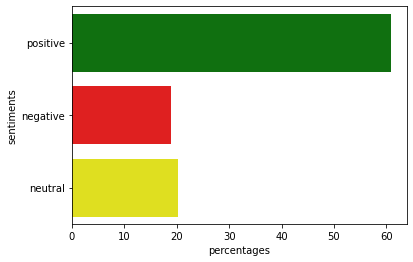

In [37]:
sns.barplot(x='percentages', y='sentiments', data=sentiments_df,
            palette=['green', 'red', 'yellow']
);

In [ ]:
fig = px.bar()